# HLA Allele splitter

## Upload data file

The file must be called dat.csv in specified format

In [36]:
from google.colab import files
uploaded = files.upload()

Saving dat.csv to dat (1).csv


In [91]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn')

## Helper functions

In [120]:
def flatten(t):
    return [item for sublist in t for item in sublist]

def get_possible_haplotypes(R,loci): # Isolate possible haplotypes from a genotype
	haps = []
	if loci == ['A_1','A_2','B_1','B_2']: # AB only
		for i in loci:
			for j in loci:
				if i != j:
					if i[0]=='A' and j[0]=='B':
						haps.append([R[i],R[j]])
	elif loci == ['A_1','A_2','B_1','B_2','C_1','C_2']: #ABC only
		for i in loci:
			for j in loci:
				for k in loci:
					if i != j and j!= k:
						if i[0]=='A' and j[0]=='B' and k[0]=='C':
							haps.append([R[i],R[j],R[k]])
	elif loci == ['A_1','A_2','B_1','B_2','C_1','C_2','DRB1_1','DRB1_2']: #ABCDR only
		for i in loci:
			for j in loci:
				for k in loci:
				  for l in loci:
					  if i != j and j!=k and k!=l:
						  if i[0]=='A' and j[0]=='B' and k[0]=='C' and l[0:2] == 'DR':
							  haps.append([R[i],R[j],R[k],R[l]])
	elif loci == ['A_1','A_2','B_1','B_2','DRB1_1','DRB1_2']: #ABCDR only
		for i in loci:
			for j in loci:
				for k in loci:
					  if i != j and j!=k:
						  if i[0]=='A' and j[0]=='B' and k[0:2]=='DR':
							  haps.append([R[i],R[j],R[k]])
	return haps

def get_haplotype_of_child_from_parent(M,F,P,loci):
	M_p = get_possible_haplotypes(M,loci)
	F_p = get_possible_haplotypes(F,loci)
	P_p = get_possible_haplotypes(P,loci)

	match_M = []
	match_F = []
	for c in P_p:
		if c in M_p:
			print("%s matches with mother" % c)
			match_M.append(c)
		if c in F_p:
			print("%s matches with father" % c)
			match_F.append(c)
	match_M = set(tuple(x) for x in match_M)
	match_F = set(tuple(x) for x in match_F)
	return list(match_M),list(match_F)

def get_haplotype_from_two_children(P1,P2,loci):
	P1_p = get_possible_haplotypes(P1,loci)	
	P2_p = get_possible_haplotypes(P2,loci)
	match = []
	for c in P1_p:
		if c in P2_p:
			print("%s matches with sibling" % c)
			match.append(c)
	match = set(tuple(x) for x in match)
	return(list(match))

### Specify mode

The mode could be 'AB', 'ABC', 'ABCDR', 'ABDR'. However, note that incomplete typing of any locus will be refused.

In [110]:
mode = 'ABDR'

In [122]:
if mode == 'AB':
	loci = ['A_1','A_2','B_1','B_2']
elif mode == 'ABC':
	loci = ['A_1','A_2','B_1','B_2','C_1','C_2']
elif mode == 'ABCDR':
	loci = ['A_1','A_2','B_1','B_2','C_1','C_2','DRB1_1','DRB1_2']
elif mode == 'ABDR':
  loci = ['A_1','A_2','B_1','B_2','DRB1_1','DRB1_2']
def analyse_allele(df):
	df.dropna(axis=1,inplace=True)
	print(df)
	print("Comparing with parents and children first")
	children = df[df['Name'].str.startswith('P')]
	mother_matches = []
	father_matches = []
	sibling_matches = []
	for i in range(len(children)):
		print("Comparing child %s" % (i+1))
		mm,fm = get_haplotype_of_child_from_parent(df.loc[0],df.loc[1],children.iloc[i],loci)
		mother_matches.append(mm)
		father_matches.append(fm)
		print("Possible haplotype from mother %s" % mm) 
		print("Possible haplotype from father %s" % fm) 
	print("Comparing between siblings")
	for i in range(len(children)-1):
		for j in range(len(children)-1):
			if i != j:
				print("Comparing child %s and %s" % (i,j))
				sibling_matches.append(get_haplotype_from_two_children(children.iloc[i],children.iloc[i+1],loci))
			print("Possible haplotype %s" % sibling_matches)

	print("FINAL RESULTS")
	print("From mother %s " % mother_matches)
	print("From father %s " % father_matches)
	print("From siblings %s " % sibling_matches)
	mm = [] 
	for m in mother_matches:
	  for el in m:
	    if type(el) is tuple:
	      mm.append(el)  
	fm = [] 
	for m in father_matches:
	  for el in m:
	    if type(el) is tuple:
	      fm.append(el)
	sm = [] 
	for m in sibling_matches:
	  for el in m:
	    if type(el) is tuple:
	      sm.append(el)
	mm = [str(x) for x in mm]
	fm = [str(x) for x in fm]
	sm = [str(x) for x in sm]
	c = Counter(mm+fm+sm)
	plt.figure(figsize=(10,5))
	plt.bar(c.keys(),c.values())
	plt.xticks(rotation=45,fontsize=15)
	plt.title('Distribution of haplotypes in family %s' % mode,fontsize=20)
 

In [40]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dat.csv']))

In [41]:
df

,Name,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DQB1_1,DQB1_2,DPB1_1,DPB1_2
0,M,1,68,44,15,1,3,15,7,NaN,NaN,NaN,NaN
1,F,24,11,27,52,2,3,5,15,NaN,NaN,NaN,NaN
2,P1,24,68,27,44,1,2,5,15,NaN,NaN,NaN,NaN
3,P2,1,24,15,27,1,3,7,15,NaN,NaN,NaN,NaN
4,P3,1,11,15,52,3,4,5,15,NaN,NaN,NaN,NaN


  Name  A_1  A_2  B_1  B_2  C_1  C_2  DRB1_1  DRB1_2
0    M    1   68   44   15    1    3      15       7
1    F   24   11   27   52    2    3       5      15
2   P1   24   68   27   44    1    2       5      15
3   P2    1   24   15   27    1    3       7      15
4   P3    1   11   15   52    3    4       5      15
Comparing with parents and children first
Comparing child 1
[24, 27, 5] matches with father
[24, 27, 15] matches with father
[68, 44, 15] matches with mother
Possible haplotype from mother [(68, 44, 15)]
Possible haplotype from father [(24, 27, 5), (24, 27, 15)]
Comparing child 2
[1, 15, 7] matches with mother
[1, 15, 15] matches with mother
[24, 27, 15] matches with father
Possible haplotype from mother [(1, 15, 15), (1, 15, 7)]
Possible haplotype from father [(24, 27, 15)]
Comparing child 3
[1, 15, 15] matches with mother
[11, 52, 5] matches with father
[11, 52, 15] matches with father
Possible haplotype from mother [(1, 15, 15)]
Possible haplotype from father [(11, 52, 5

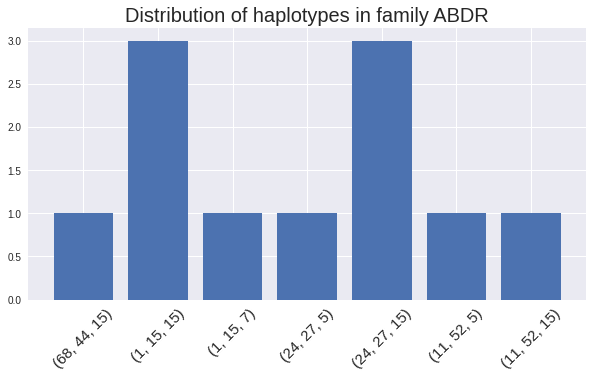

In [123]:
analyse_allele(df)